<a href="https://colab.research.google.com/github/ClaudioH19/TareasML/blob/master/Notebook_Tarea_Zoo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Paso 1: Cargar el dataset
import pandas as pd

columnas = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne",
    "aquatic", "predator", "toothed", "backbone", "breathes",
    "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"
]

df = pd.read_csv('/content/drive/MyDrive/zoo/zoo.data', names=columnas)
df.set_index('animal_name', inplace=True)  # Usar nombre de animal como índice

# Exploración
print(df.info())
print(df.columns)
print(df.head())


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 14.2+ KB
None
Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes

In [6]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)

# Separar etiquetas
labels = df["type"]
df_features = df.drop(columns=["type"])

# Normalizar características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features),
                         columns=df_features.columns,
                         index=df_features.index)




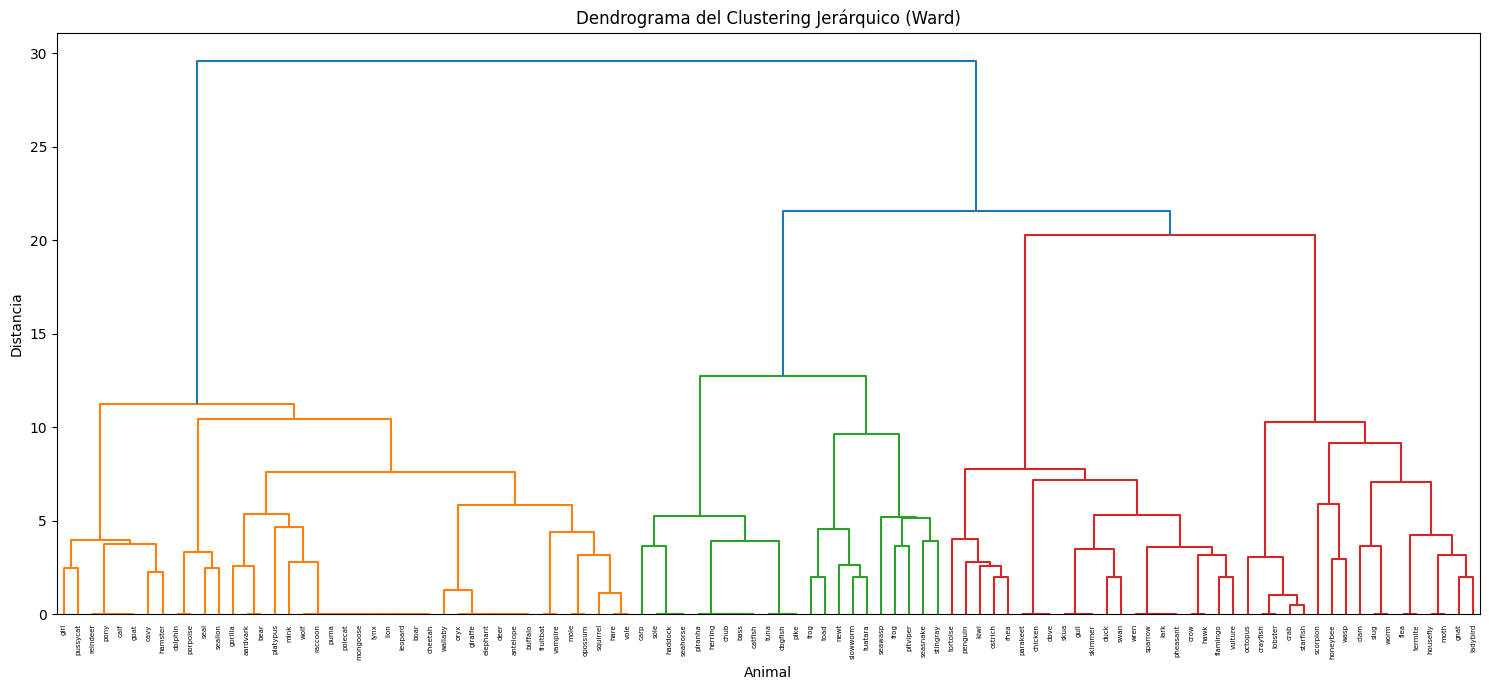

In [7]:
# Paso 3: Clustering Jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, labels=df_scaled.index, leaf_rotation=90)
plt.title('Dendrograma del Clustering Jerárquico (Ward)')
plt.xlabel('Animal')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

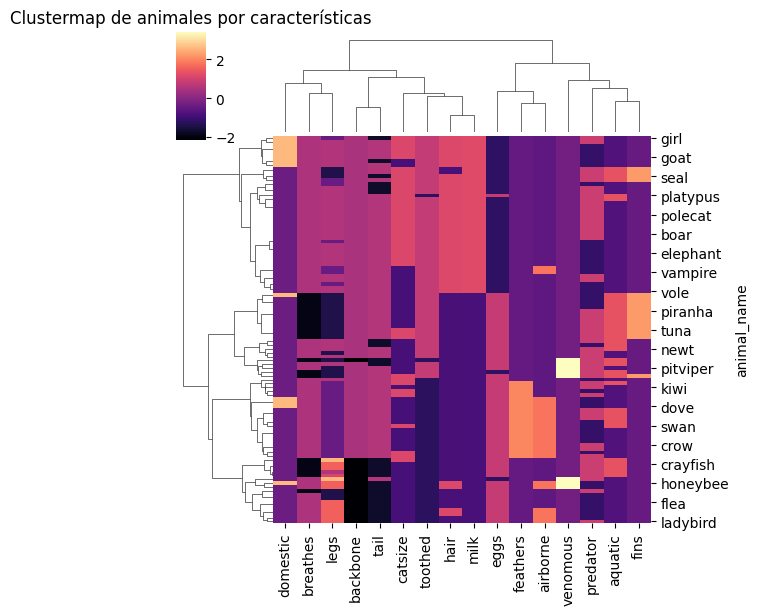

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


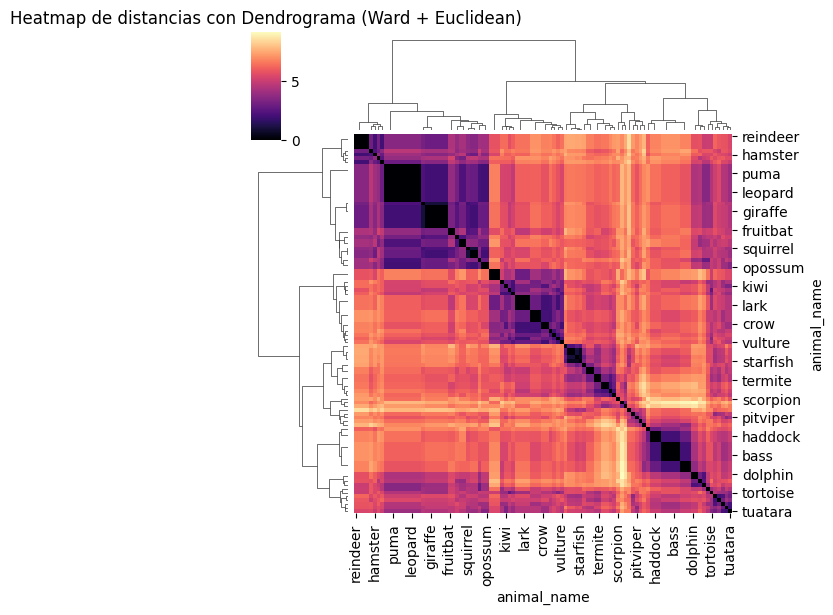

In [10]:
# Paso 4: Heatmap
# Heatmap de características con dendrogramas
import seaborn as sns
sns.clustermap(df_scaled,  # datos normalizados por características
               cmap="magma",
               metric="euclidean",
               method="ward",
               figsize=(6, 6))

plt.title("Clustermap de animales por características")
plt.show()


from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Calcular matriz de distancias entre animales
distance_matrix = pdist(df_scaled, metric="euclidean")
dist_df = pd.DataFrame(squareform(distance_matrix),
                       index=df_scaled.index,
                       columns=df_scaled.index)

# Visualizar con clustermap (agrega dendrogramas automáticamente)
sns.clustermap(dist_df,
               cmap="magma",
               metric="euclidean",
               method="ward",
               figsize=(6, 6))

plt.title("Heatmap de distancias con Dendrograma (Ward + Euclidean)")
plt.show()

# Conclusiones
El heatmap revela entre 4 y 6 regiones bien definidas con alta similitud interna, representadas por zonas más oscuras cercanas a la diagonal. Esto sugiere que el algoritmo logra capturar agrupaciones naturales en los datos. Por ejemplo, se observan clústeres que corresponden a grupos biológicos como mamíferos, aves o peces, lo cual valida que las similitudes estructurales entre animales han sido reconocidas correctamente por el clustering jerárquico aplicado.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Se identifican claramente al menos 4 clústeres grandes en el dendrograma, que agrupan especies con características similares (por ejemplo, todos los mamíferos o todas las aves). Si se observa con mayor detalle, también pueden distinguirse subgrupos más pequeños, por lo que el número total podría ascender a 6 o incluso 7 clústeres secundarios.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las características que más parecen influir en la formación de los clústeres son, mirando el heatmap de características son: milk, hair, feathers, fins, eggs y aquatic. Estas corresponden a rasgos altamente discriminativos entre clases biológicas, como mamíferos (milk, hair), aves (feathers), peces (fins), o anfibios y reptiles (eggs).

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Sí, podemos ver que los animales en realidad sí están emparentados entre sí, por ejemplo, podemos observar que un leopardo se parece mucho a un puma, o podemos ver zonas más grandes oscurecidas como las aves, donde logra identificar correctamente el clúster
Escribe tu respuesta aquí.


## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

La normalización es extremadamente importante, ya que permite que no existan variables más importantes que otras, sobretodo cuando usamos distancia euclidiana para calcular similitud, así evitamos distorsionar la agrupación, permitiendo representar relaciones más reales y equilibradas

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Se utilizó el método de Ward, ya que minimiza la varianza dentro de cada clúster al fusionar grupos, lo que da como resultado clústeres compactos y bien diferenciados. Además, Ward funciona bien con distancias euclidianas, que fueron utilizadas en este análisis


## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Cambiando métricas: Podríamos probar métodos de linkage como complete, average o single con métricas más apropiadas para datos binarios, lo cual puede cambiar la forma en que se forman los clústeres.

DBSCAN: Es útil si se sospecha que hay outliers o animales que no encajan claramente en ningún grupo. Como DBSCAN no necesita que se especifique el número de clústeres, puede revelar estructuras no evidentes y validar si los clústeres anteriores son robustos.